# Trading strategy 

In [1]:
#importing packages
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize as optimize

### 1. 
### (a) I choose the S&P 500 Energy sector and the corresponding  Energy ETF


In [5]:
sectors = pd.read_excel("/Users/Dhriti/Desktop/forwardSector.xlsx", index_col = 0, parse_dates = True)
sectors

,S5MATR Index (R1),S5ENRS Index (R2),S4RLST Index (L1),S5FINL Index (R1),S5INDU Index (R1),S5TELS Index (R1),S5UTIL Index (R1),S5COND Index (L1),S5CONS Index (R1),S5HLTH Index (R1),S5INFT Index (L1),SPX Index (R1)
Date,,,,,,,,,,,,
2023-01-31,17.9081,10.7430,32.2286,13.3426,19.1048,15.5487,18.0203,22.8799,20.3698,17.3003,22.6707,18.1990
2023-01-27,17.5719,10.9352,31.7015,13.2034,18.9574,15.6275,18.0010,22.8657,20.1476,17.1977,22.7657,18.1617
2023-01-20,17.1242,10.6727,30.3745,12.8771,18.3096,14.9715,18.0841,21.3794,20.1048,17.2956,21.5423,17.5797
2023-01-13,17.3470,10.5296,29.7772,13.0073,18.8523,14.5053,18.6572,21.3390,20.7692,17.3790,21.4114,17.6258
2023-01-06,16.5958,10.1140,28.1291,12.7110,18.7490,13.9931,18.5873,19.9729,21.1234,17.3654,20.4468,17.1330
...,...,...,...,...,...,...,...,...,...,...,...,...
1991-02-22,NaN,12.8942,NaN,NaN,NaN,NaN,10.8394,NaN,NaN,17.4912,NaN,NaN
1991-02-15,NaN,12.9320,NaN,NaN,NaN,NaN,10.9106,NaN,NaN,17.5917,NaN,NaN
1991-02-08,NaN,12.9943,NaN,NaN,NaN,NaN,10.7161,NaN,NaN,16.8258,NaN,NaN


In [3]:
sectors.isnull().sum()

S5MATR Index  (R1)     694
S5ENRS Index  (R2)      16
S4RLST Index  (L1)    1324
S5FINL Index  (R1)     720
S5INDU Index  (R1)     107
S5TELS Index  (R1)     439
S5UTIL Index  (R1)      21
S5COND Index  (L1)     610
S5CONS Index  (R1)     248
S5HLTH Index  (R1)      39
S5INFT Index  (L1)     593
SPX Index  (R1)        505
dtype: int64

In [4]:
sectors.columns

Index(['S5MATR Index  (R1)', 'S5ENRS Index  (R2)', 'S4RLST Index  (L1)',
       'S5FINL Index  (R1)', 'S5INDU Index  (R1)', 'S5TELS Index  (R1)',
       'S5UTIL Index  (R1)', 'S5COND Index  (L1)', 'S5CONS Index  (R1)',
       'S5HLTH Index  (R1)', 'S5INFT Index  (L1)', 'SPX Index  (R1)'],
      dtype='object')

In [5]:
# load in forward PE data on Energy industry
sectors = pd.read_excel("/Users/Dhriti/Desktop/forwardSector.xlsx", index_col = 0, parse_dates = True)[["S5ENRS Index  (R2)"]][::-1]
sectors.columns = ["Sector PE"]
sectors

,Sector PE
Date,
1991-01-25,12.2606
1991-02-01,12.1357
1991-02-08,12.9943
1991-02-15,12.9320
1991-02-22,12.8942
...,...
2023-01-06,10.1140
2023-01-13,10.5296
2023-01-20,10.6727


In [6]:
# pull in prices for the energy ETF
sector = "XLE"
sector = yf.download(sector)[["Adj Close"]].copy()
sector

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1998-12-22 00:00:00-05:00,12.782507
1998-12-23 00:00:00-05:00,13.048623
1998-12-24 00:00:00-05:00,12.979950
1998-12-28 00:00:00-05:00,12.911276
1998-12-29 00:00:00-05:00,13.040041
...,...
2023-03-02 00:00:00-05:00,86.089996
2023-03-03 00:00:00-05:00,87.260002
2023-03-06 00:00:00-05:00,87.300003


In [7]:
# merge fundamentals
data = pd.merge_asof(sectors, sector,left_index = True, right_index = True)[::-1]

# sample down to the monthly level
data = data.resample('M').last()
data["returns"] = np.log(data["Adj Close"]).diff()
data.dropna(inplace = True)
# there is a gap in the data before this time, so I snip off that period
data = data[data.index.year <= 2019].copy()

In [8]:
data

,Sector PE,Adj Close,returns
Date,,,
1999-01-31,24.3994,11.984132,-0.079822
1999-02-28,24.6170,11.958379,-0.002151
1999-03-31,28.2014,13.474612,0.119375
1999-04-30,32.0009,15.835254,0.161431
1999-05-31,29.6791,15.077095,-0.049062
...,...,...,...
2019-08-31,14.9717,47.052055,-0.088040
2019-09-30,15.7268,49.266689,0.045994
2019-10-31,17.2070,48.771053,-0.010111


A low P/E ratio might indicate that the current stock price is low relative to earnings. so, as we can see that the P/E ratio is falling it may be the case that the stock is being under valued. 

Text(0.5, 1.0, 'Energy Forward P/E Ratio and Energy ETF data')

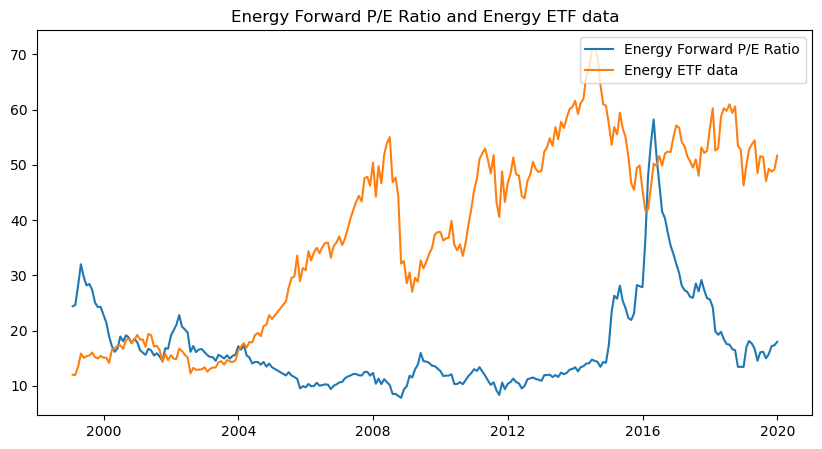

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(data["Sector PE"],label='Energy Forward P/E Ratio')
plt.plot(data["Adj Close"],label ='Energy ETF data')
plt.legend(loc='upper right')
plt.title("Energy Forward P/E Ratio and Energy ETF data")


### Here I will optimize the hyperparameters for k,z,w on the first 80 percent of the data where I will fix the holding period for the strategy at one week

In [10]:
import pandas as pd

# split the dataset into 80% and 20% sets
train_size = int(len(data) * 0.8)
df_copy, val_df = data[:train_size], data[train_size:]

# split the dataset into 80% and 20% sets
print("Training set shape:", df_copy.shape)
print("Validation set shape:", val_df.shape)

Training set shape: (198, 3)
Validation set shape: (50, 3)


In [11]:
# specify candidate values for hyperparameters
ks = np.linspace(.01, .99, 10)
zs = np.linspace(.01, 3, 10)
ws = np.arange(5, 30, 5)
hs =  1
import itertools as it
# build a grid with all possible hyperparameters
grid = np.array(np.meshgrid(ks,zs, ws, hs)).T.reshape(-1,4)

grid

array([[1.00000000e-02, 1.00000000e-02, 5.00000000e+00, 1.00000000e+00],
       [1.00000000e-02, 3.42222222e-01, 5.00000000e+00, 1.00000000e+00],
       [1.00000000e-02, 6.74444444e-01, 5.00000000e+00, 1.00000000e+00],
       ...,
       [9.90000000e-01, 2.33555556e+00, 2.50000000e+01, 1.00000000e+00],
       [9.90000000e-01, 2.66777778e+00, 2.50000000e+01, 1.00000000e+00],
       [9.90000000e-01, 3.00000000e+00, 2.50000000e+01, 1.00000000e+00]])

In [12]:
storage = pd.DataFrame(columns = ["k", "z", "w", "h", "profits"])
df_copy = data.copy()

for n in range(len(grid)):
    # Each loop we pull out the values for a new set of hyperparamters from the grid
    k,z,w,h= grid[n]
    
    # We fit a filter and CI using the next set of parameters
    df_copy["Filter"] = df_copy["Sector PE"].ewm(alpha = k, adjust = False).mean()
    df_copy["Filter Error"] = df_copy["Sector PE"] -df_copy["Filter"]
    df_copy["std"] = df_copy["Filter Error"].rolling(int(w)).std()
    df_copy["Upper"] = df_copy["Filter"] + z*df_copy["std"]
    df_copy["Lower"] = df_copy["Filter"] - z*df_copy["std"]
    df_copy["test"] = np.where(df_copy["Filter Error"].abs()>z*df_copy["std"], 1, 0)*np.sign(df_copy["Filter Error"])
    
    # create vectors where we can store information on signals and when the change is first signalled
    df_copy["test2"] = 0
    df_copy["signal"] = 0
    
    for j in df_copy.index:
        # if there is a change in the signal, we want to take a position for teh next h periods
        if (df_copy.loc[j, "test"] == 1) &  (df_copy.shift().loc[j, "test"] != 1):
            df_copy.loc[j:j+datetime.timedelta(h), "signal"] = 1
            df_copy.loc[j, "test2"] = 1
        elif (df_copy.loc[j, "test"] == -1) &  (df_copy.shift().loc[j, "test"] != -1):
            df_copy.loc[j:j+datetime.timedelta(h), "signal"] =  -1
            df_copy.loc[j, "test2"] = -1
    
    # calculate metric
    df_copy["cumulative_returns"] = np.exp((df_copy["signal"].shift()*df_copy.returns).cumsum())-1
    
    # store the results
    storage = storage.append({"k":k, "z":z, "w":w, "h":h,
                "profits":df_copy["cumulative_returns"][-1]}, ignore_index = True)
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
storage = storage.sort_values(by = "profits").reset_index(drop = True)

In [14]:
storage 

,k,z,w,h,profits
0,0.990000,1.006667,10.0,1.0,-0.860465
1,0.772222,0.342222,10.0,1.0,-0.826139
2,0.990000,0.674444,15.0,1.0,-0.823026
3,0.881111,1.006667,10.0,1.0,-0.806705
4,0.772222,0.342222,5.0,1.0,-0.804861
...,...,...,...,...,...
495,0.010000,1.006667,10.0,1.0,0.369027
496,0.227778,2.335556,5.0,1.0,0.375692
497,0.118889,2.667778,5.0,1.0,0.401259
498,0.118889,2.335556,5.0,1.0,0.904903



### heatmap

In [15]:
def heatmap(x, y, metric, values):
    
    # specify the columns I will be pulling from the results
    p2p = values[[x, y, metric]]
    
    heat = np.round(p2p.groupby([x,y]).max(),1)
    heat = heat.unstack()[metric]

    # round labels
    heat.index = np.round(heat.index,2)
    heat.columns = np.round(heat.columns,2)

    # make plot
    f, ax = plt.subplots(figsize=(25, 12))
    ax = sns.heatmap(heat, fmt='.1g')
    ax.set_title("Heat map of "+ metric,size = 18)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(y, size = 18)
    ax.set_ylabel(x, size = 18)
    ax.collections[0].colorbar.set_label(metric, size = 18)
    sns.set(font_scale=1)
    plt.show()

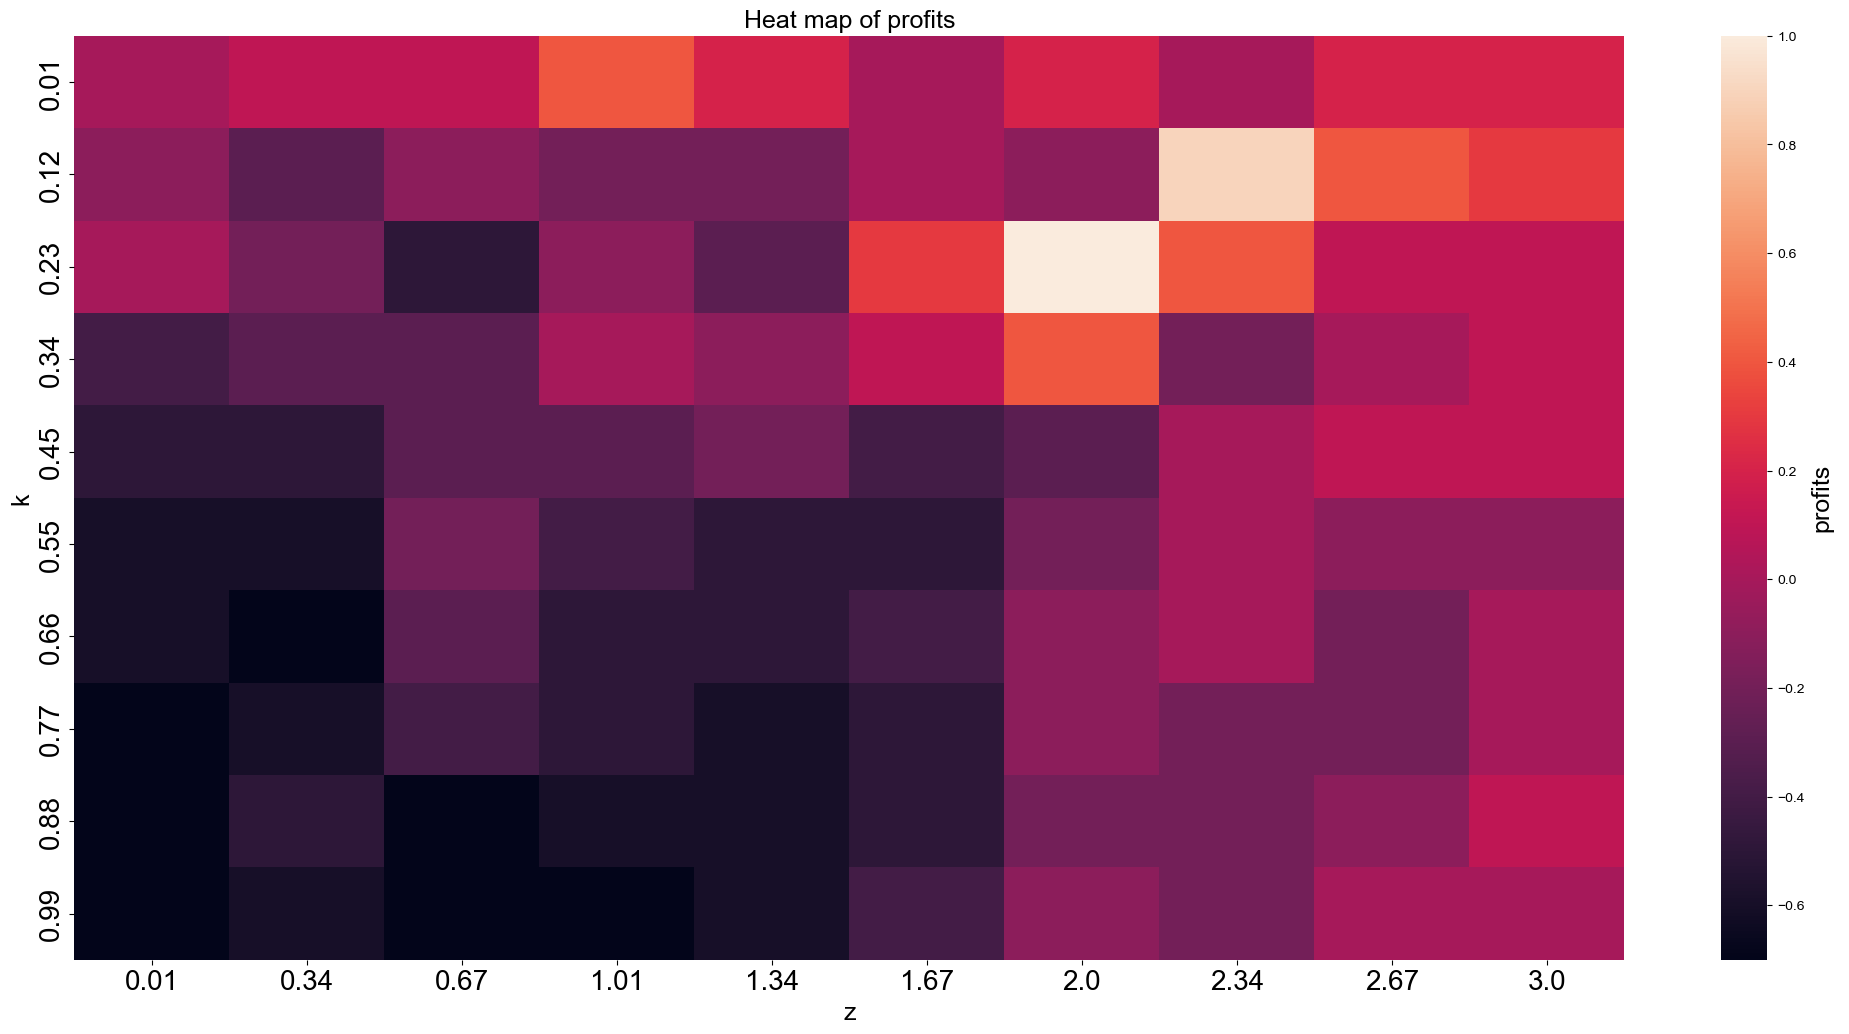

In [16]:
heatmap("k", "z","profits", storage)

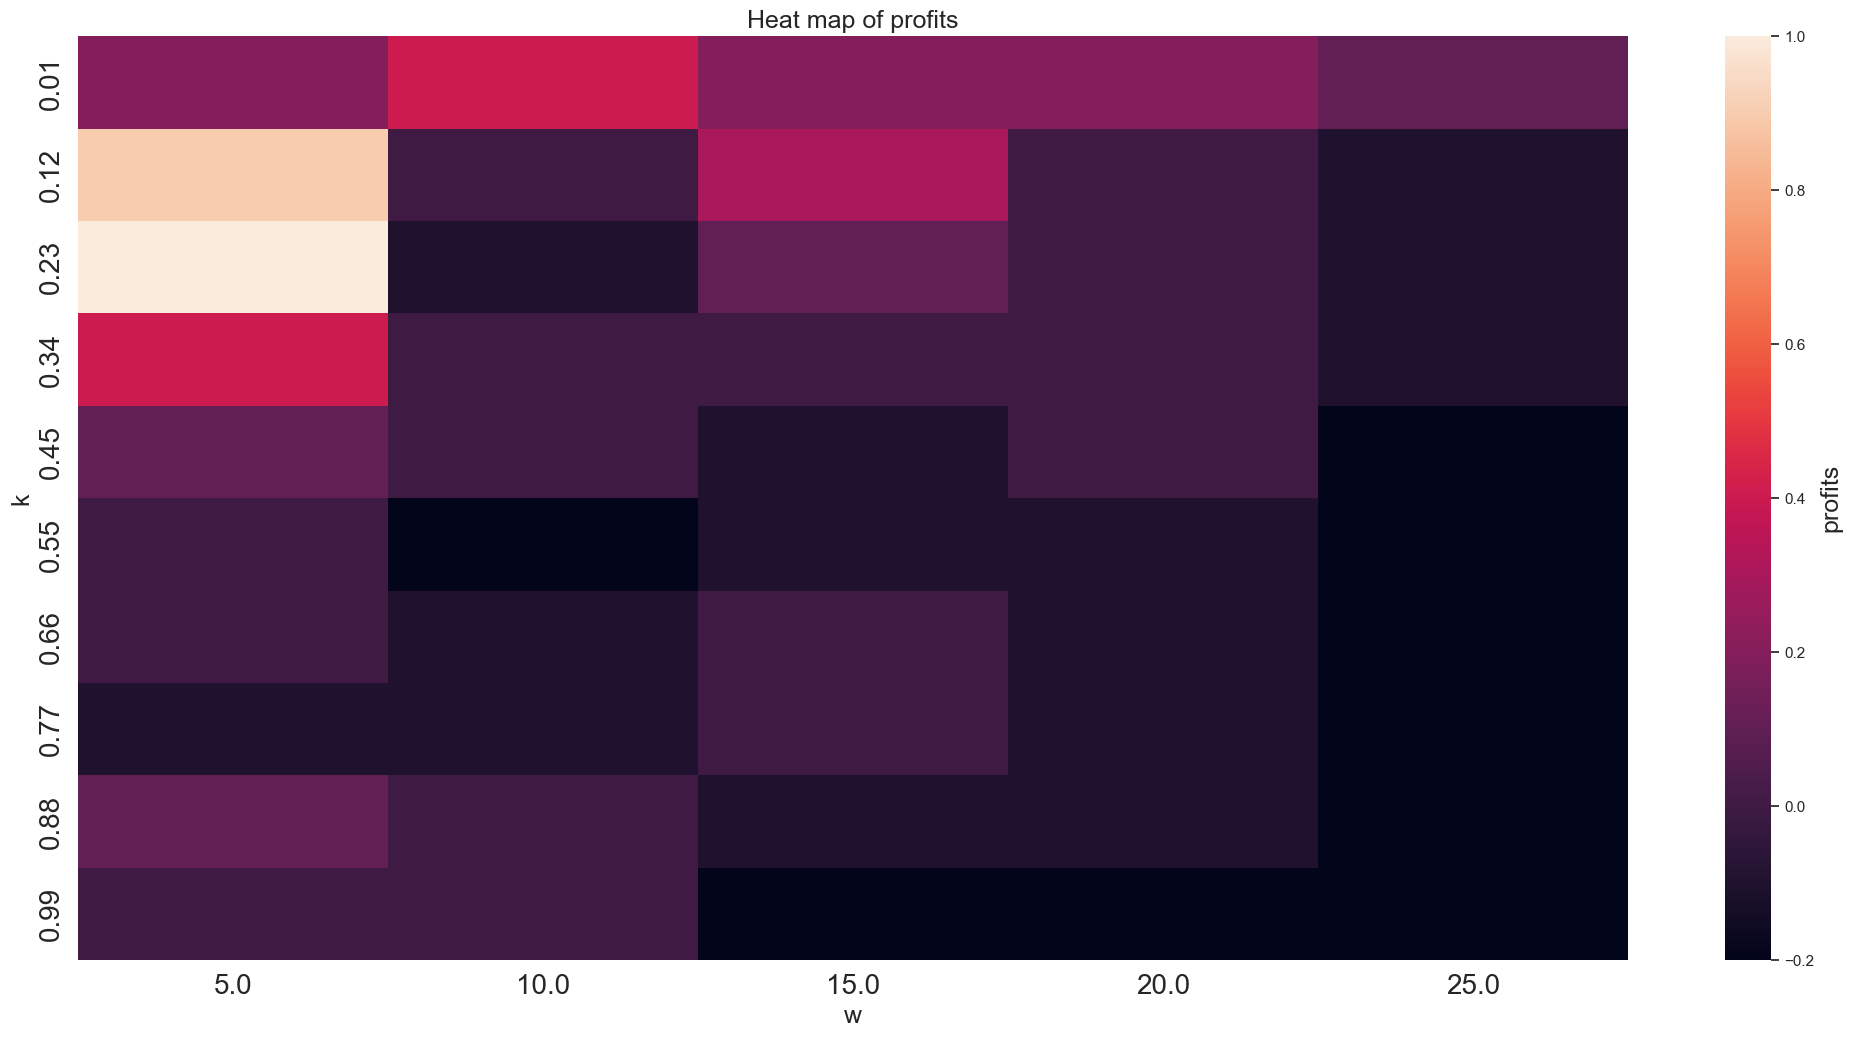

In [17]:
heatmap("k", "w","profits", storage)

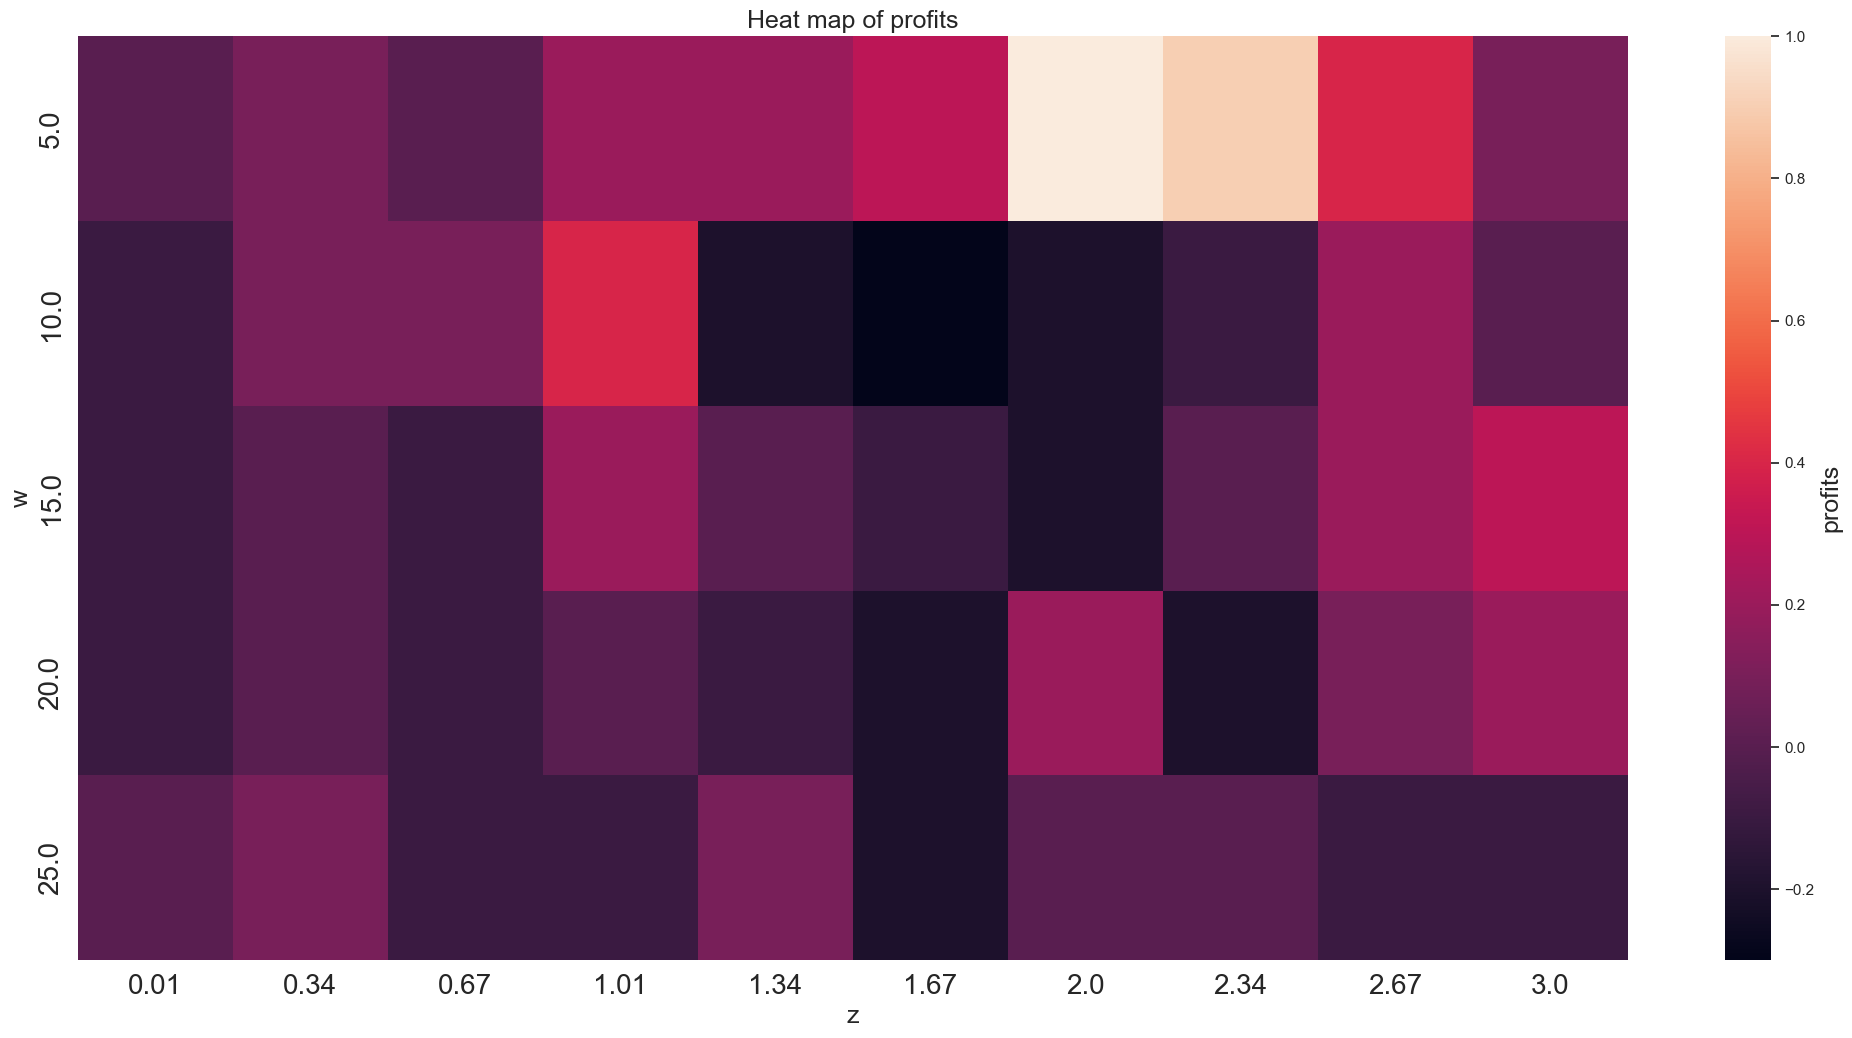

In [18]:
heatmap("w", "z","profits", storage)

###  Below we can pick out a specific combination and see how it performs.

In [19]:
storage = storage.sort_values(by="profits").reset_index(drop=True)
# now we can pick out the highest performing set of hyperparameters
k,z,w, h, p = storage.iloc[-1,:]
k = 0.227778
z = 2.003333
w = 5.0
h = 1.0
p =0.985807
df_copy["Filter"] = df_copy["Sector PE"].ewm(alpha = k, adjust = False).mean()
df_copy["Filter Error"] = df_copy["Sector PE"] -df_copy["Filter"]
df_copy["std"] = df_copy["Filter Error"].rolling(int(w)).std()
df_copy["Upper"] = df_copy["Filter"] + z*df_copy["std"]
df_copy["Lower"] = df_copy["Filter"] - z*df_copy["std"]

df_copy["test"] = np.where(df_copy["Filter Error"].abs()>z*df_copy["std"], 1, 0)*np.sign(df_copy["Filter Error"])

df_copy["test2"] = 0
df_copy["signal"] = 0
for j in df_copy.index:
    if (df_copy.loc[j, "test"] == 1) &  (df_copy.shift().loc[j, "test"] != 1):
        df_copy.loc[j:j+datetime.timedelta(h), "signal"] = 1
        df_copy.loc[j, "test2"] = 1
    elif (df_copy.loc[j, "test"] == -1) &  (df_copy.shift().loc[j, "test"] != -1):
        df_copy.loc[j:j+datetime.timedelta(h), "signal"] =  -1
        df_copy.loc[j, "test2"] = -1
df_copy["cumulative_returns"] = np.exp((df_copy["signal"].shift()*df_copy.returns).cumsum())-1
df_copy["strat_returns"] = df_copy["signal"].shift()*df_copy.returns


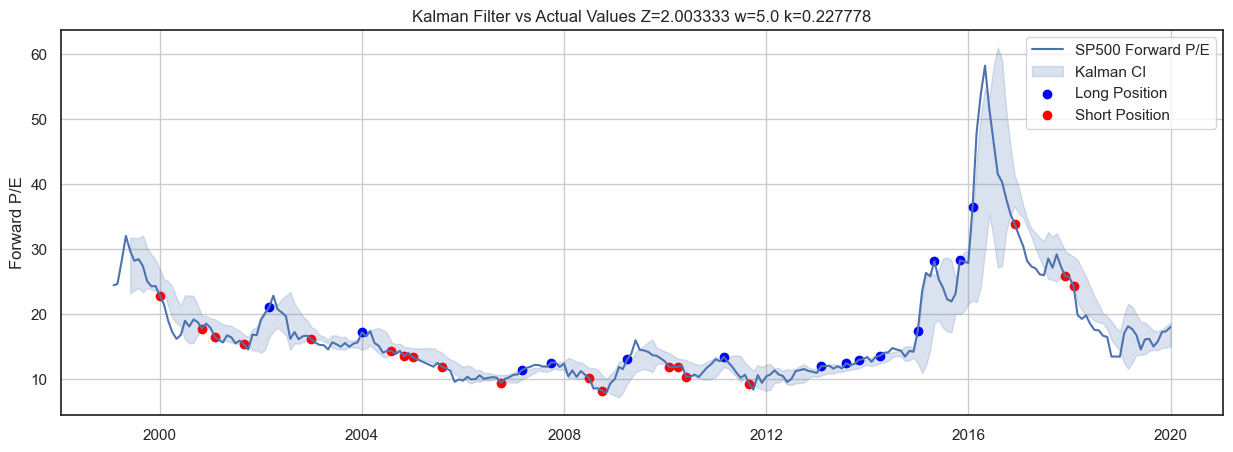

In [20]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Forward P/E")
ax.plot(df_copy["Sector PE"])
#ax.plot(df_copy["Filter"])


ax.fill_between(df_copy.index, df_copy.Lower, df_copy.Upper, color='b', alpha=.2)
ax.scatter(df_copy[df_copy.test2 == 1].index, df_copy[df_copy.test2 == 1]["Sector PE"], color = "blue")
ax.scatter(df_copy[df_copy.test2 == -1].index, df_copy[df_copy.test2 == -1]["Sector PE"], color = "red")

#ax.axvline(df_copy.index[-5], color = "red", linestyle = '--')
ax.legend(["SP500 Forward P/E", "Kalman CI", "Long Position", "Short Position"])


#plt.xlim([datetime.date(2000, 1, 1), datetime.date(2004, 1, 1)])
ax.grid()

In [21]:
df_copy["success"] = ((df_copy[df_copy.test2 != 0]["cumulative_returns"].diff()>0)*1).shift(-1)

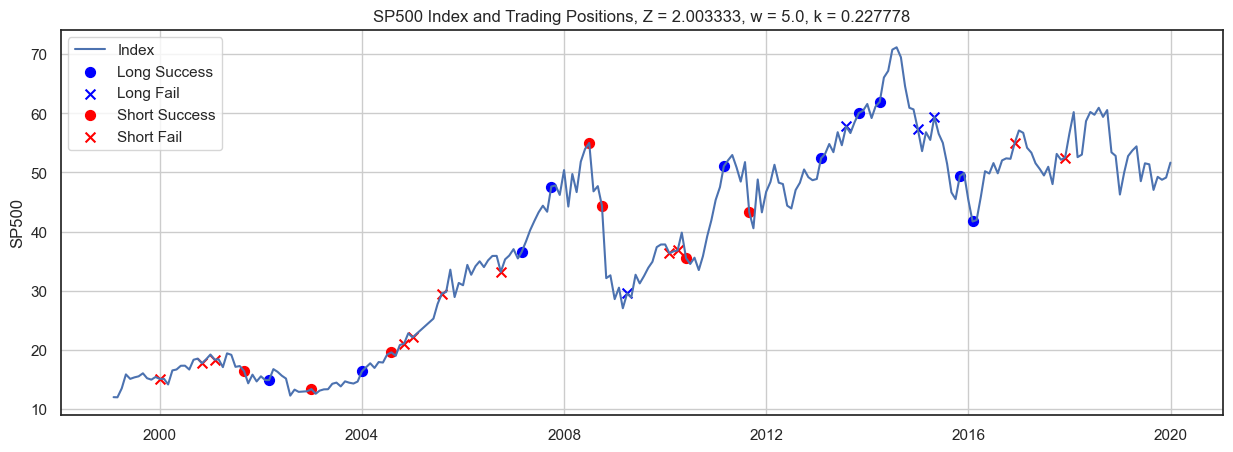

In [22]:
plt.figure(figsize = (15, 5))

plt.title("SP500 Index and Trading Positions"+ ", Z = "+str(z) + ", w = " + str(w)+ ", k = " + str(k))
plt.ylabel("SP500")
plt.plot(df_copy["Adj Close"])

longsuccess = df_copy[(df_copy["success"] == 1) & (df_copy["test2"] == 1)]
longfail = df_copy[(df_copy["success"] == 0) & (df_copy["test2"] == 1)] 
shortsuccess = df_copy[(df_copy["success"] == 1) & (df_copy["test2"] == -1)]
shortfail = df_copy[(df_copy["success"] == 0) & (df_copy["test2"] == -1)]

plt.scatter(longsuccess.index, longsuccess["Adj Close"], color = 'blue', s = 50)
plt.scatter(longfail.index, longfail["Adj Close"], color = 'blue', s = 50, marker = "x")

plt.scatter(shortsuccess.index, shortsuccess["Adj Close"], color = 'red', s = 50)
plt.scatter(shortfail.index, shortfail["Adj Close"], color = 'red', s = 50, marker = "x")

plt.legend(["Index", "Long Success", "Long Fail", "Short Success", "Short Fail"])
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
plt.grid()

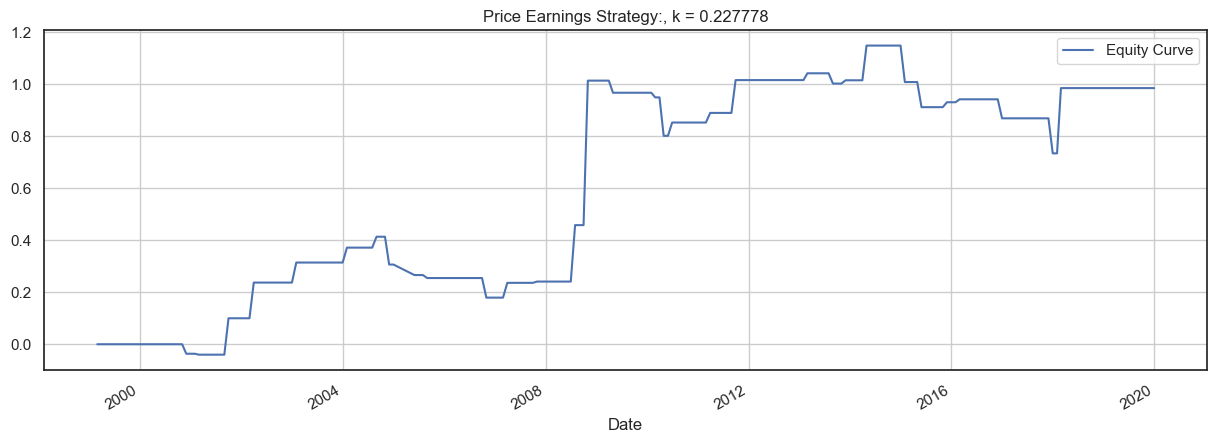

In [23]:
plt.figure(figsize = (15, 5))
(df_copy["cumulative_returns"]).plot()

plt.title("Price Earnings Strategy:"+", k = " + str(k))
plt.legend(["Equity Curve"])

plt.grid()

### Now applying my strategy to the final 20% of the data set to visualize your returns over the testing set and report the:
- Total Rate of Return
- Annualized Return
- Rate of return only over the days we hold a position
- Sharpe Ratio - Use the 1-year-treasury-rate-yield-chart.csv data to get the risk free rates for each period (this is the Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity series from Fred)
- Gini Coefficient

In [24]:
val_df = val_df

In [25]:
storage = pd.DataFrame(columns = ["k", "z", "w", "h", "profits"])
val_df = data.copy()

for n in range(len(grid)):
    # Each loop we pull out the values for a new set of hyperparamters from the grid
    k,z,w,h= grid[n]
    
    # We fit a filter and CI using the next set of parameters
    val_df["Filter"] = val_df["Sector PE"].ewm(alpha = k, adjust = False).mean()
    val_df["Filter Error"] = val_df["Sector PE"] -val_df["Filter"]
    val_df["std"] = val_df["Filter Error"].rolling(int(w)).std()
    val_df["Upper"] = val_df["Filter"] + z*val_df["std"]
    val_df["Lower"] = val_df["Filter"] - z*val_df["std"]
    val_df["test"] = np.where(val_df["Filter Error"].abs()>z*val_df["std"], 1, 0)*np.sign(val_df["Filter Error"])
    
    # create vectors where we can store information on signals and when the change is first signalled
    val_df["test2"] = 0
    val_df["signal"] = 0
    
    for j in df_copy.index:
        # if there is a change in the signal, we want to take a position for teh next h periods
        if (val_df.loc[j, "test"] == 1) &  (val_df.shift().loc[j, "test"] != 1):
            val_df.loc[j:j+datetime.timedelta(h), "signal"] = 1
            val_df.loc[j, "test2"] = 1
        elif (val_df.loc[j, "test"] == -1) &  (val_df.shift().loc[j, "test"] != -1):
            val_df.loc[j:j+datetime.timedelta(h), "signal"] =  -1
            val_df.loc[j, "test2"] = -1
    
    # calculate metric
    val_df["cumulative_returns"] = np.exp((val_df["signal"].shift()*val_df.returns).cumsum())-1
    
    # store the results
    storage = storage.append({"k":k, "z":z, "w":w, "h":h,
                "profits":val_df["cumulative_returns"][-1]}, ignore_index = True)
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [26]:
storage

,k,z,w,h,profits
0,0.01,0.010000,5.0,1.0,-0.057671
1,0.01,0.342222,5.0,1.0,0.073647
2,0.01,0.674444,5.0,1.0,-0.008299
3,0.01,1.006667,5.0,1.0,0.192134
4,0.01,1.338889,5.0,1.0,0.184237
...,...,...,...,...,...
495,0.99,1.671111,25.0,1.0,-0.571012
496,0.99,2.003333,25.0,1.0,-0.396485
497,0.99,2.335556,25.0,1.0,-0.308970
498,0.99,2.667778,25.0,1.0,-0.163922


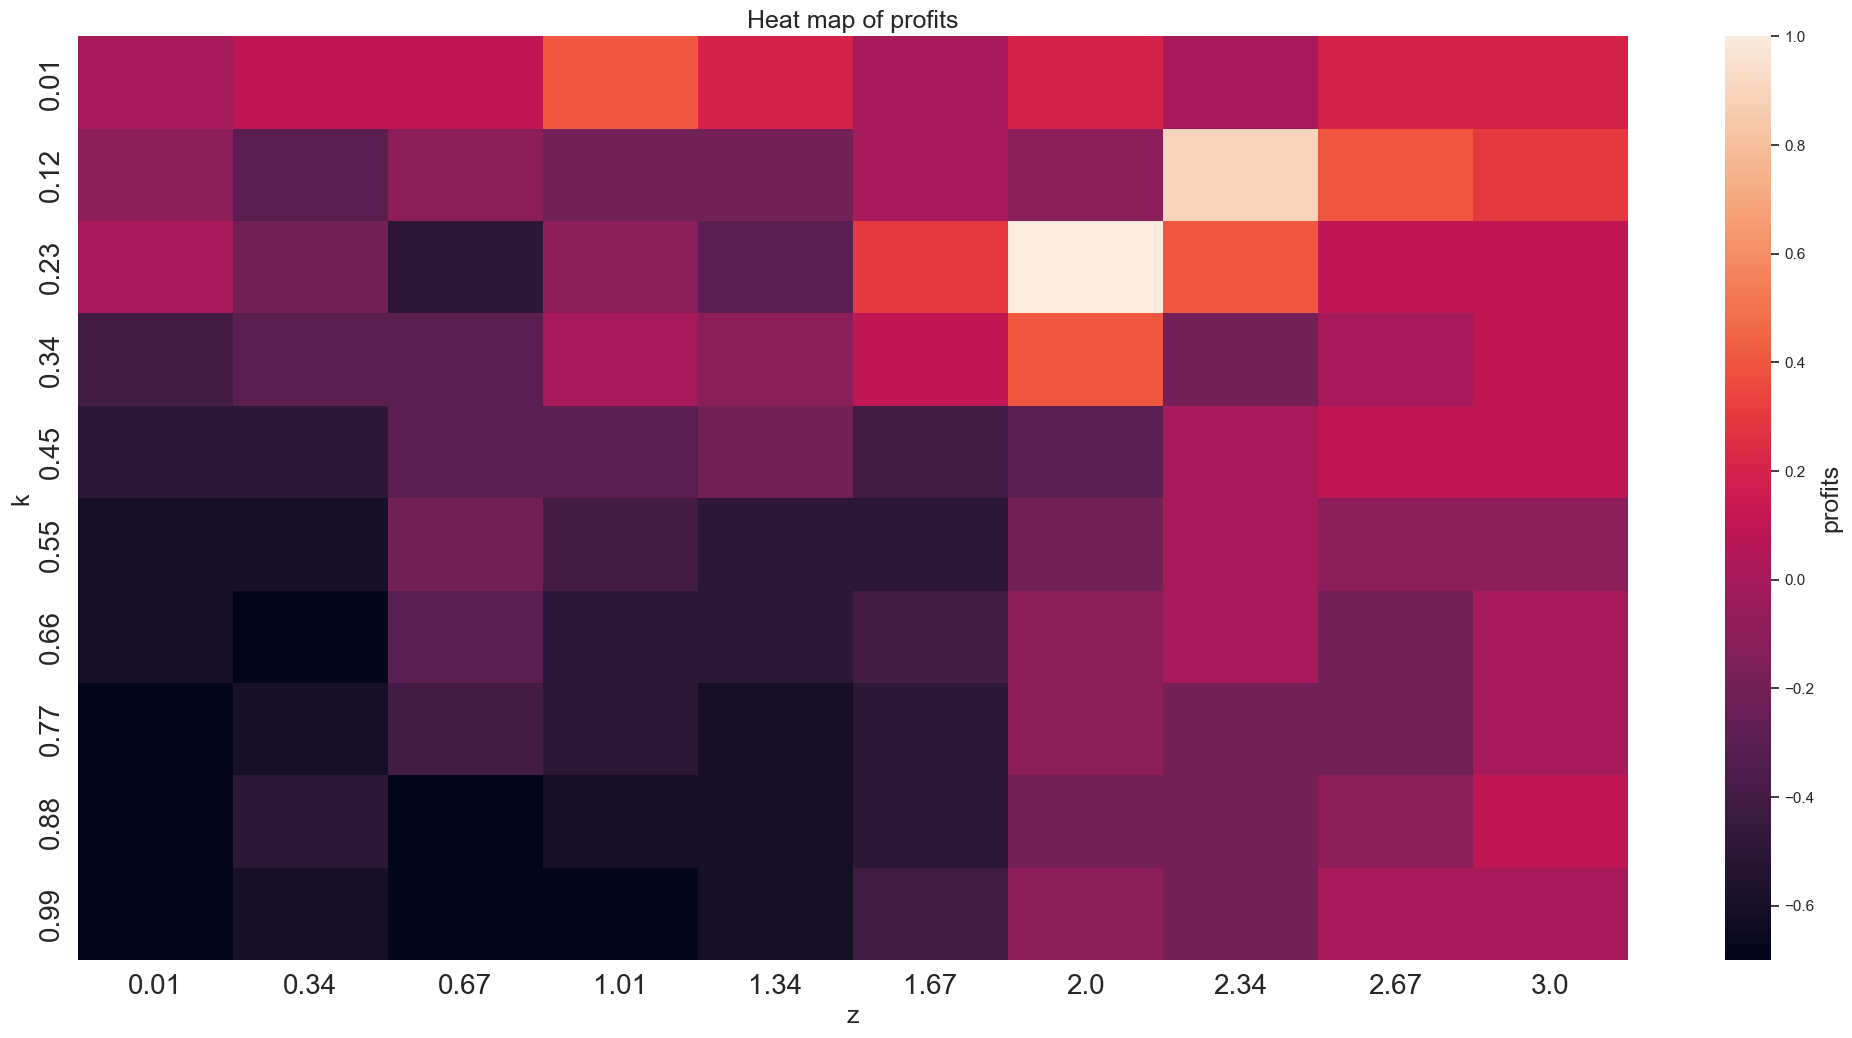

In [27]:
heatmap("k", "z","profits", storage)

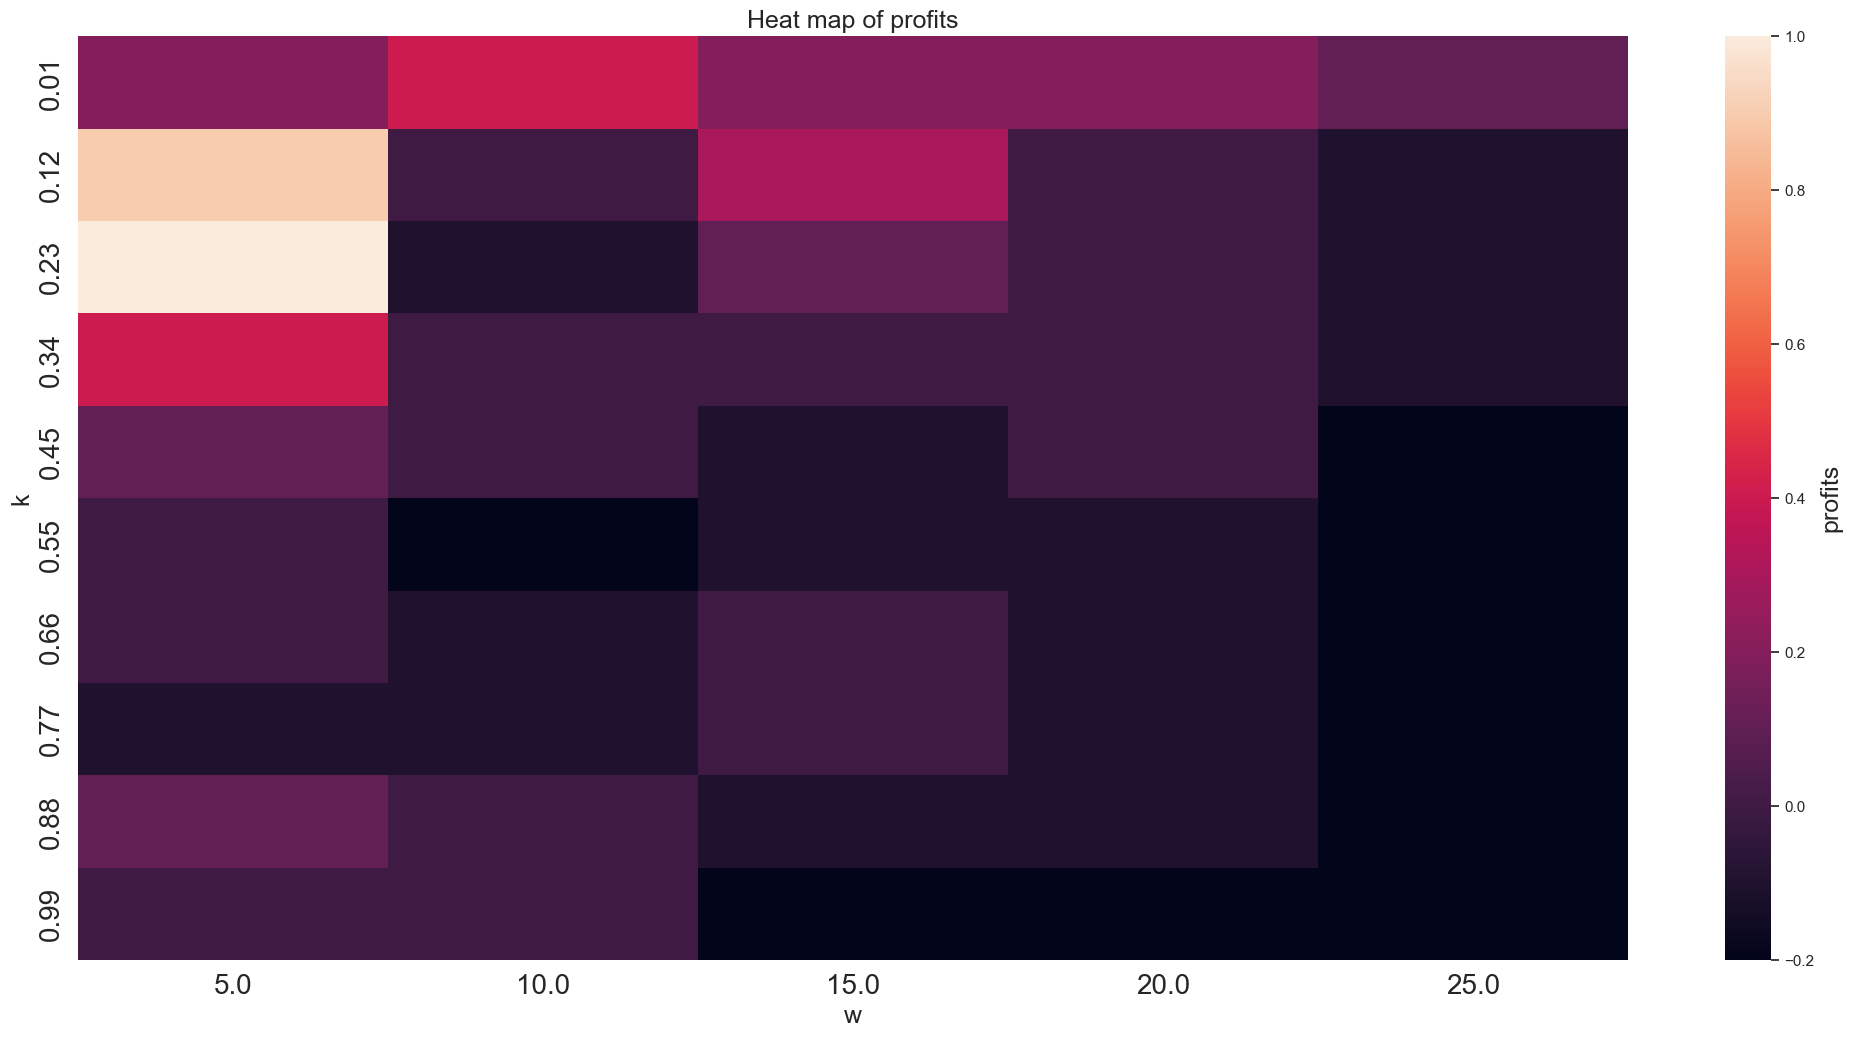

In [28]:
heatmap("k", "w","profits", storage)

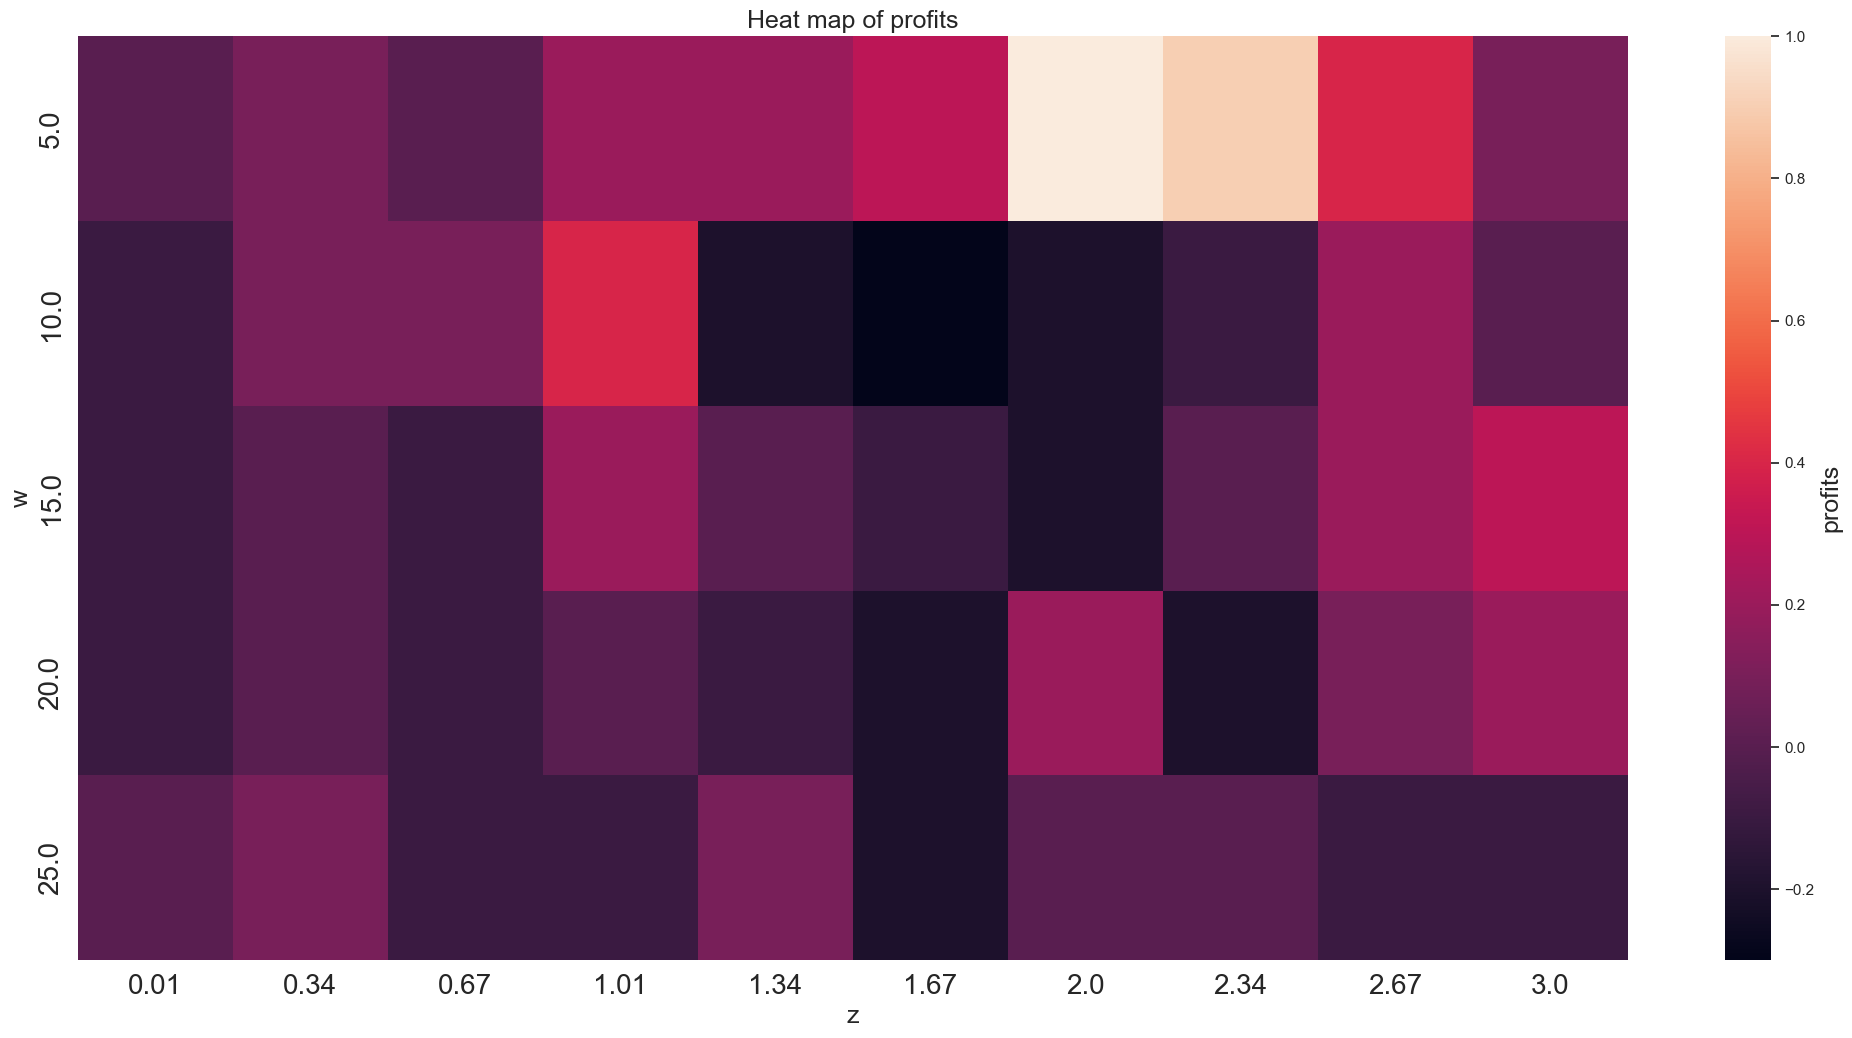

In [29]:
heatmap("w", "z","profits", storage)

In [30]:
storage = storage.sort_values(by = "profits").reset_index(drop = True)

In [31]:
k,z,w, h, p = storage.iloc[-1,:]
k = 0.227778
z = 2.003333
w = 5.0
h = 1.0
p =0.985807

In [32]:
val_df["Filter"] = val_df["Sector PE"].ewm(alpha = k, adjust = False).mean()
val_df["Filter Error"] = val_df["Sector PE"] -val_df["Filter"]
val_df["std"] = val_df["Filter Error"].rolling(int(w)).std()
val_df["Upper"] = val_df["Filter"] + z*val_df["std"]
val_df["Lower"] = val_df["Filter"] - z*val_df["std"]

val_df["test"] = np.where(val_df["Filter Error"].abs()>z*val_df["std"], 1, 0)*np.sign(val_df["Filter Error"])

val_df["test2"] = 0
val_df["signal"] = 0
for j in val_df.index:
    if (val_df.loc[j, "test"] == 1) &  (val_df.shift().loc[j, "test"] != 1):
        val_df.loc[j:j+datetime.timedelta(h), "signal"] = 1
        val_df.loc[j, "test2"] = 1
    elif (val_df.loc[j, "test"] == -1) &  (val_df.shift().loc[j, "test"] != -1):
        val_df.loc[j:j+datetime.timedelta(h), "signal"] =  -1
        val_df.loc[j, "test2"] = -1
val_df["cumulative_returns"] = np.exp((val_df["signal"].shift()*val_df.returns).cumsum())-1
val_df["strat_returns"] = val_df["signal"].shift()*val_df.returns

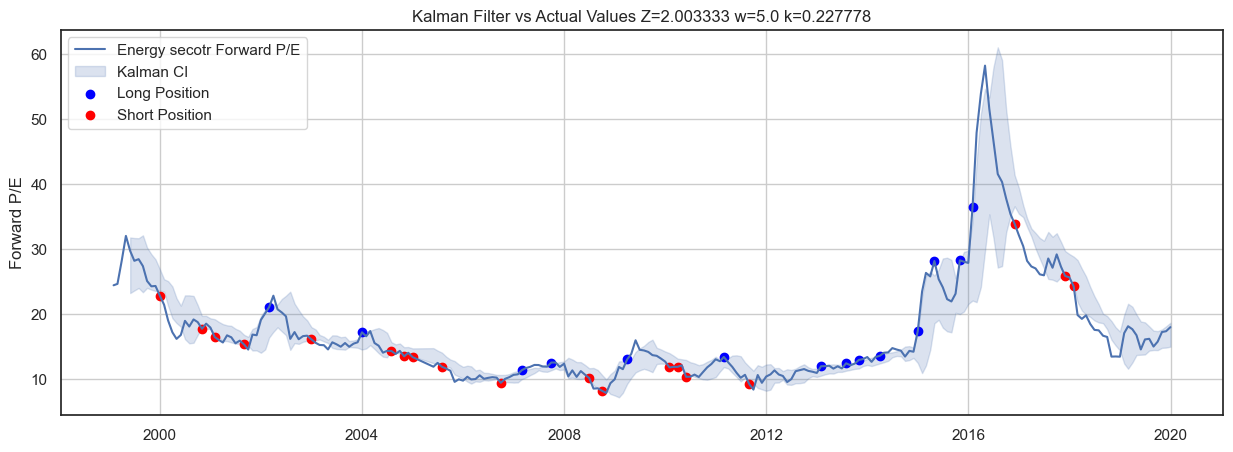

In [33]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Forward P/E")
ax.plot(val_df["Sector PE"])
#ax.plot(df_copy["Filter"])


ax.fill_between(val_df.index, val_df.Lower, val_df.Upper, color='b', alpha=.2)
ax.scatter(val_df[val_df.test2 == 1].index, val_df[val_df.test2 == 1]["Sector PE"], color = "blue")
ax.scatter(val_df[val_df.test2 == -1].index, val_df[val_df.test2 == -1]["Sector PE"], color = "red")

#ax.axvline(df_copy.index[-5], color = "red", linestyle = '--')
ax.legend(["Energy secotr Forward P/E", "Kalman CI", "Long Position", "Short Position"])


#plt.xlim([datetime.date(2000, 1, 1), datetime.date(2004, 1, 1)])
ax.grid()

In [34]:
val_df["success"] = ((val_df[val_df.test2 != 0]["cumulative_returns"].diff()>0)*1).shift(-1)

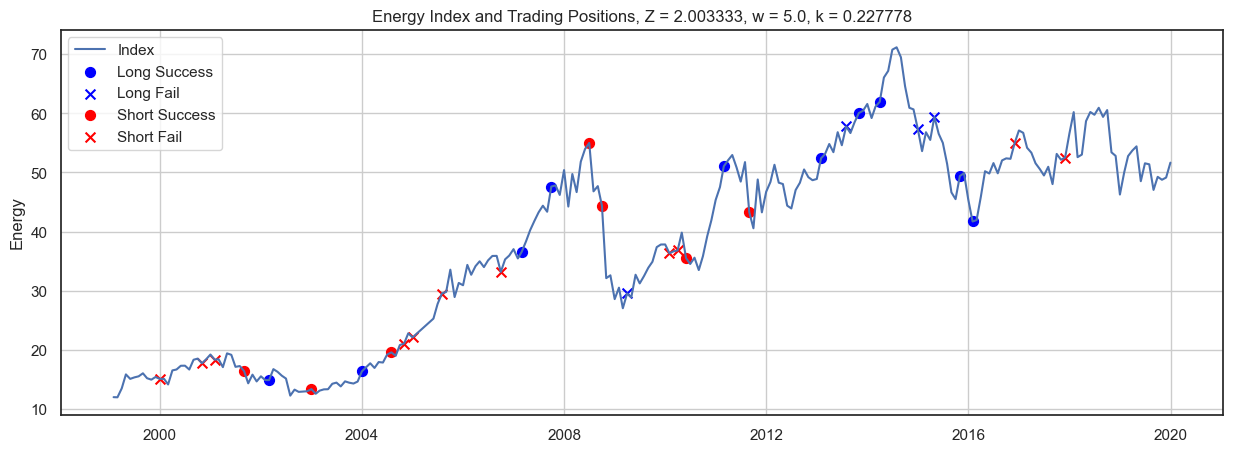

In [35]:
plt.figure(figsize = (15, 5))

plt.title("Energy Index and Trading Positions"+ ", Z = "+str(z) + ", w = " + str(w)+ ", k = " + str(k))
plt.ylabel("Energy")
plt.plot(val_df["Adj Close"])

longsuccess = val_df[(df_copy["success"] == 1) & (val_df["test2"] == 1)]
longfail = val_df[(df_copy["success"] == 0) & (val_df["test2"] == 1)] 
shortsuccess = val_df[(df_copy["success"] == 1) & (val_df["test2"] == -1)]
shortfail = val_df[(df_copy["success"] == 0) & (val_df["test2"] == -1)]

plt.scatter(longsuccess.index, longsuccess["Adj Close"], color = 'blue', s = 50)
plt.scatter(longfail.index, longfail["Adj Close"], color = 'blue', s = 50, marker = "x")

plt.scatter(shortsuccess.index, shortsuccess["Adj Close"], color = 'red', s = 50)
plt.scatter(shortfail.index, shortfail["Adj Close"], color = 'red', s = 50, marker = "x")

plt.legend(["Index", "Long Success", "Long Fail", "Short Success", "Short Fail"])
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
plt.grid()

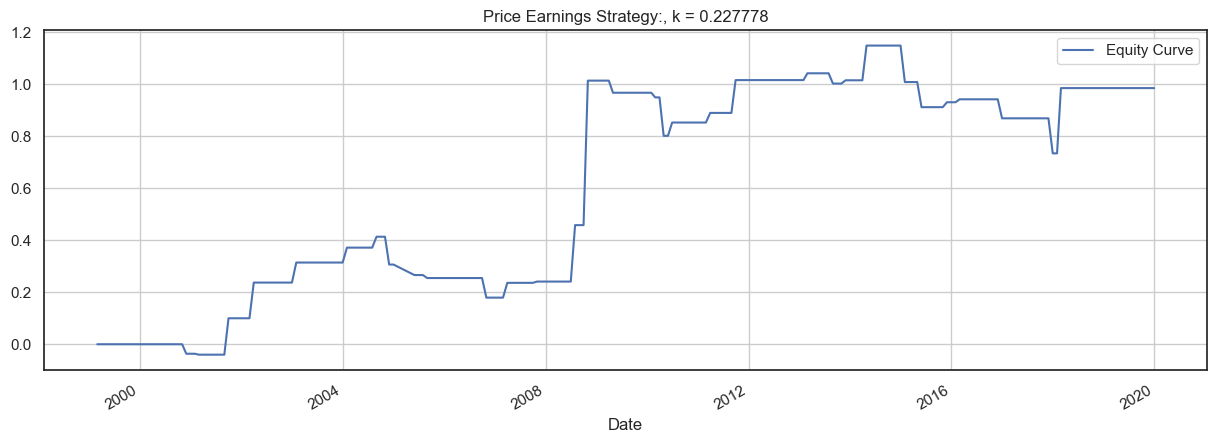

In [36]:
plt.figure(figsize = (15, 5))
(df_copy["cumulative_returns"]).plot()

plt.title("Price Earnings Strategy:"+", k = " + str(k))
plt.legend(["Equity Curve"])

plt.grid()

In [ ]:
### Metric calculation

### Total Rate of Return 

In [37]:
total_return = val_df["cumulative_returns"].iloc[-1]
total_return
# Print the total return
print("Total Return %.2f%%"% total_return)

Total Return 0.99%


### Annualized Return

In [38]:
# Assuming the investment period is 22 years
t = len(val_df)/52
P = 1000
A = (1+0.985807)*P
annual = ((A/P)**(1/t)-1)*100

# Print the annualized return
print("Annualized Return %.2f%%"% annual)


Annualized Return 15.47%


### Rate of return only over the days we hold a position

In [39]:
P = 1000
A = (1+ 0.985811)*P
T = len(val_df[val_df["signal"]!= 0])/52

Rate_of_return = ((A/P)**(1/T)-1)*100
Rate_of_return

194.76636241299366

## Sharpe ratio

In [40]:
rate = pd.read_csv('/Users/Dhriti/Desktop/1-year-treasury-rate-yield-chart.csv', index_col = 0, parse_dates = True)

In [41]:
cols = [i for i in df_copy.columns]
cols.append('risk_free')

In [42]:
ratio = pd.merge_asof(val_df, rate,left_index = True, right_index = True)
ratio

,Sector PE,Adj Close,returns,Filter,Filter Error,std,Upper,Lower,test,test2,signal,cumulative_returns,strat_returns,success,value
Date,,,,,,,,,,,,,,,
1999-01-31,24.3994,11.984132,-0.079822,24.399400,0.000000,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,4.51
1999-02-28,24.6170,11.958379,-0.002151,24.448964,0.168036,NaN,NaN,NaN,0.0,0,0,0.000000,-0.0,NaN,4.88
1999-03-31,28.2014,13.474612,0.119375,25.303687,2.897713,NaN,NaN,NaN,0.0,0,0,0.000000,0.0,NaN,4.72
1999-04-30,32.0009,15.835254,0.161431,26.829165,5.171735,NaN,NaN,NaN,0.0,0,0,0.000000,0.0,NaN,4.78
1999-05-31,29.6791,15.077095,-0.049062,27.478317,2.200783,2.134466,31.754364,23.202270,0.0,0,0,0.000000,-0.0,NaN,4.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,14.9717,47.052055,-0.088040,15.927104,-0.955404,0.743133,17.415847,14.438362,-0.0,0,0,0.985819,-0.0,NaN,1.76
2019-09-30,15.7268,49.266689,0.045994,15.881480,-0.154680,0.729352,17.342615,14.420344,-0.0,0,0,0.985819,0.0,NaN,1.75
2019-10-31,17.2070,48.771053,-0.010111,16.183404,1.023596,0.706143,17.598043,14.768765,0.0,0,0,0.985819,-0.0,NaN,1.53


In [43]:
ratio.columns

Index(['Sector PE', 'Adj Close', 'returns', 'Filter', 'Filter Error', 'std',
       'Upper', 'Lower', 'test', 'test2', 'signal', 'cumulative_returns',
       'strat_returns', 'success', ' value'],
      dtype='object')

In [44]:
returns = ratio[["strat_returns"]].copy().dropna()

In [45]:
returns["risk_free"] = (ratio[[' value']].dropna()/100+1)**(1/52)-1
returns.columns

Index(['strat_returns', 'risk_free'], dtype='object')

In [46]:
returns["excess_return"] = returns['strat_returns'] - returns['risk_free']
returns

,strat_returns,risk_free,excess_return
Date,,,
1999-02-28,-0.0,0.000917,-0.000917
1999-03-31,0.0,0.000887,-0.000887
1999-04-30,0.0,0.000898,-0.000898
1999-05-31,-0.0,0.000933,-0.000933
1999-06-30,0.0,0.000952,-0.000952
...,...,...,...
2019-08-31,-0.0,0.000336,-0.000336
2019-09-30,0.0,0.000334,-0.000334
2019-10-31,-0.0,0.000292,-0.000292


In [47]:
sharpe = (returns["excess_return"].mean())/(returns["excess_return"].std())
sharpe
## low sharpe ratio

0.07827371049435276

### GINI coefficient 

In [48]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values( by = "strat_returns"))
    # start from 0
    LorenzCurve = pd.DataFrame({ 'strat_returns': [0]}).append(LorenzCurve)
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["strat_returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["strat_returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea + ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["strat_returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["strat_returns"])) * periods) + ((max(LorenzCurve["strat_returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["strat_returns"]) * periods)/2)
    gini = UpArea / AllArea
    return (gini[0])

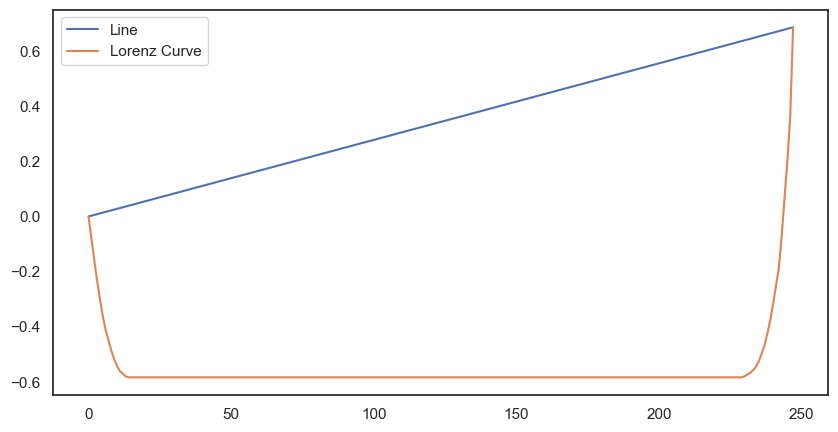

In [49]:
periods = len(returns)
LorenzCurve = np.cumsum(returns.sort_values( by = "strat_returns"))
# start from 0
LorenzCurve = pd.DataFrame({ 'strat_returns': [0]}).append(LorenzCurve)
Line = LorenzCurve.copy()
Line["strat_returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["strat_returns"])
plt.figure(figsize = (10, 5))
plt.plot(Line["strat_returns"].values)
plt.plot(LorenzCurve["strat_returns"].values)
plt.legend(["Line", "Lorenz Curve"])

In [50]:
GINI_COEF(returns)

0.9649071516627202